In [106]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns

In [107]:
df = pd.read_csv('/Users/Owner/Desktop/train.csv', sep=";")

In [108]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [109]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [110]:
# Step 4: Checking for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)




Missing values in each column:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [111]:
# Check the value counts for each categorical column
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

for col in categorical_columns:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())



Value counts for job:
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

Value counts for marital:
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

Value counts for education:
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

Value counts for default:
default
no     44396
yes      815
Name: count, dtype: int64

Value counts for housing:
housing
yes    25130
no     20081
Name: count, dtype: int64

Value counts for loan:
loan
no     37967
yes     7244
Name: count, dtype: int64

Value counts for contact:
contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

Value counts for month:
month
may    13766
jul     68

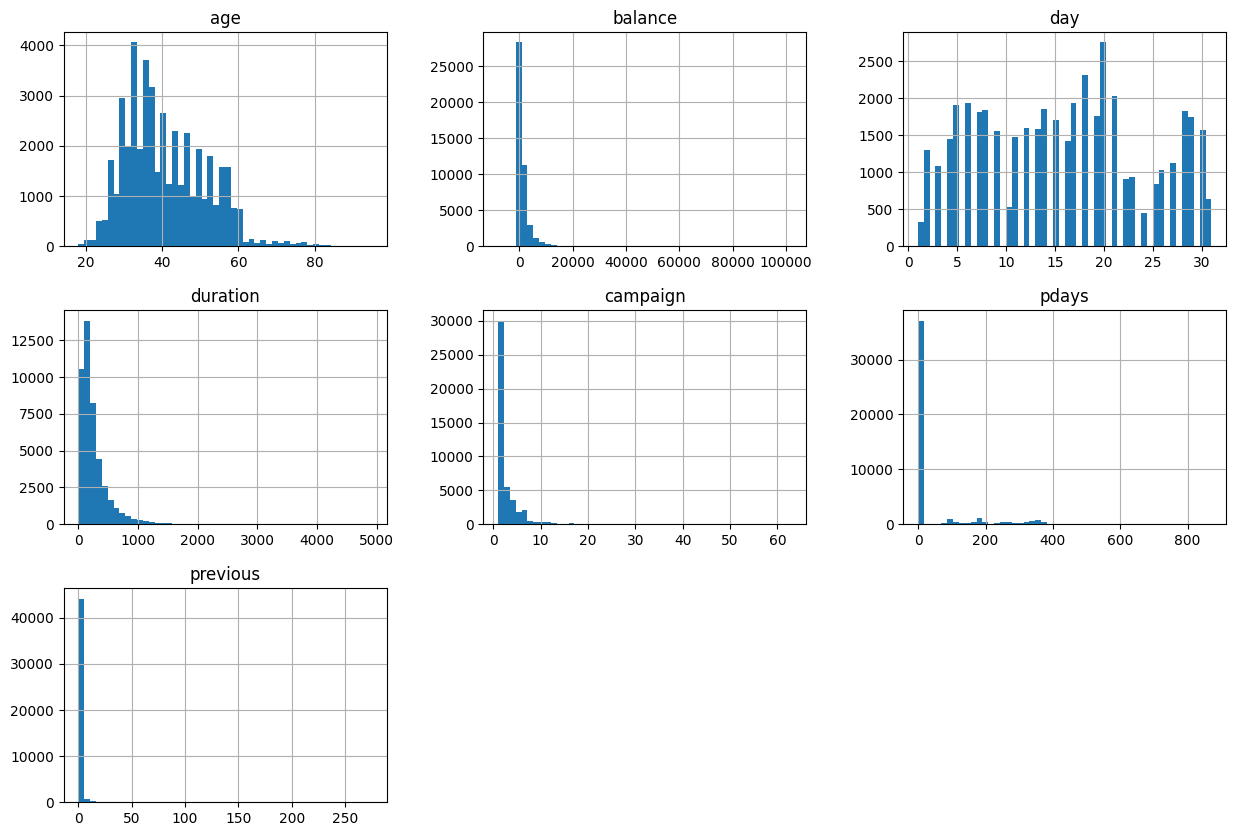

In [112]:
import matplotlib.pyplot as plt

# Plot histograms for numerical columns
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

df[numerical_columns].hist(bins=50, figsize=(15, 10))
plt.show()


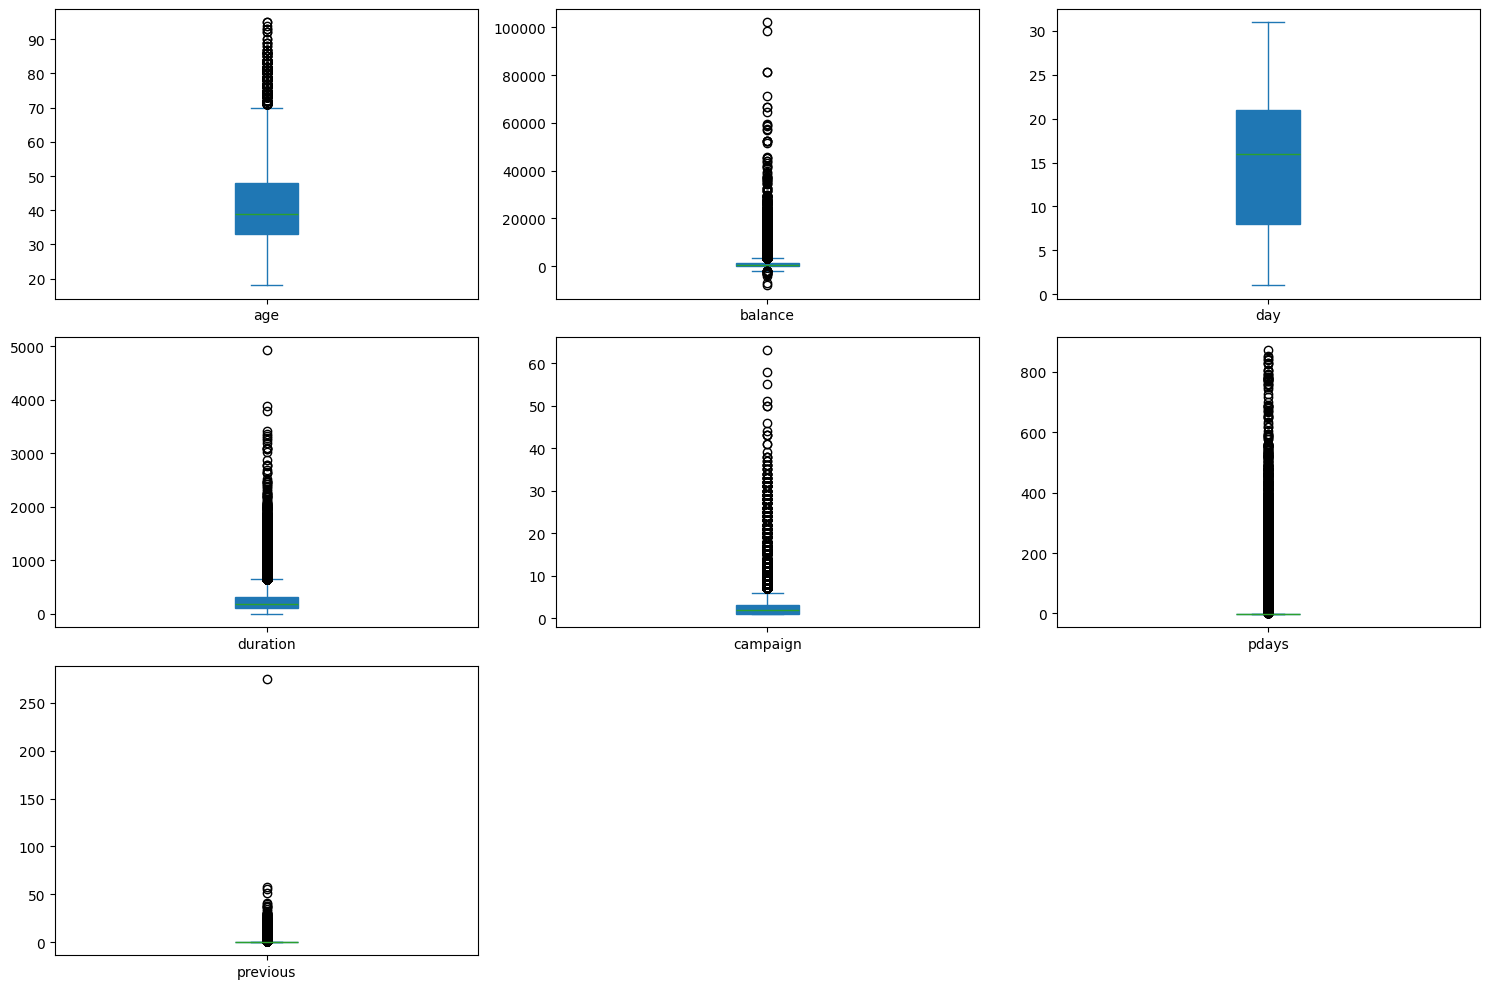

In [113]:
import matplotlib.pyplot as plt

# List of numerical variables of interest
numerical_columns = ['age', 'balance', 'day','duration', 'campaign', 'pdays', 'previous']

# Create boxplots for each specified variable
df[numerical_columns].plot(kind="box", subplots=True, layout=(3, 3), figsize=(15, 10), patch_artist=True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

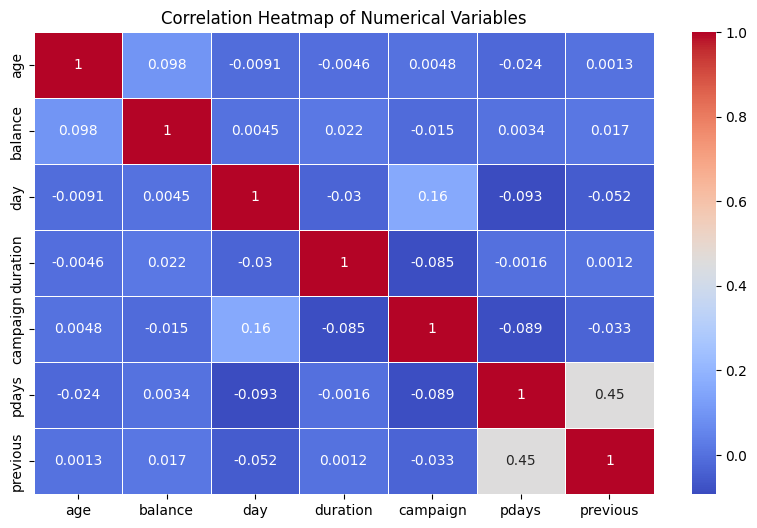

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns from the dataset
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Calculate the correlation matrix for the numerical variables
correlation_matrix = df[numerical_columns].corr()

# Generate a heatmap for the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


/var/folders/j6/k6gy0m_x02b05c849w1998_c0000gn/T/ipykernel_13587/91156769.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='y', y=col, data=df, palette='Set3')
/var/folders/j6/k6gy0m_x02b05c849w1998_c0000gn/T/ipykernel_13587/91156769.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='y', y=col, data=df, palette='Set3')
/var/folders/j6/k6gy0m_x02b05c849w1998_c0000gn/T/ipykernel_13587/91156769.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='y', y=col, data=df, palette='Set3')
/var/folders/j6/k6gy0m_x02b05c849w1998_c0000gn/T/

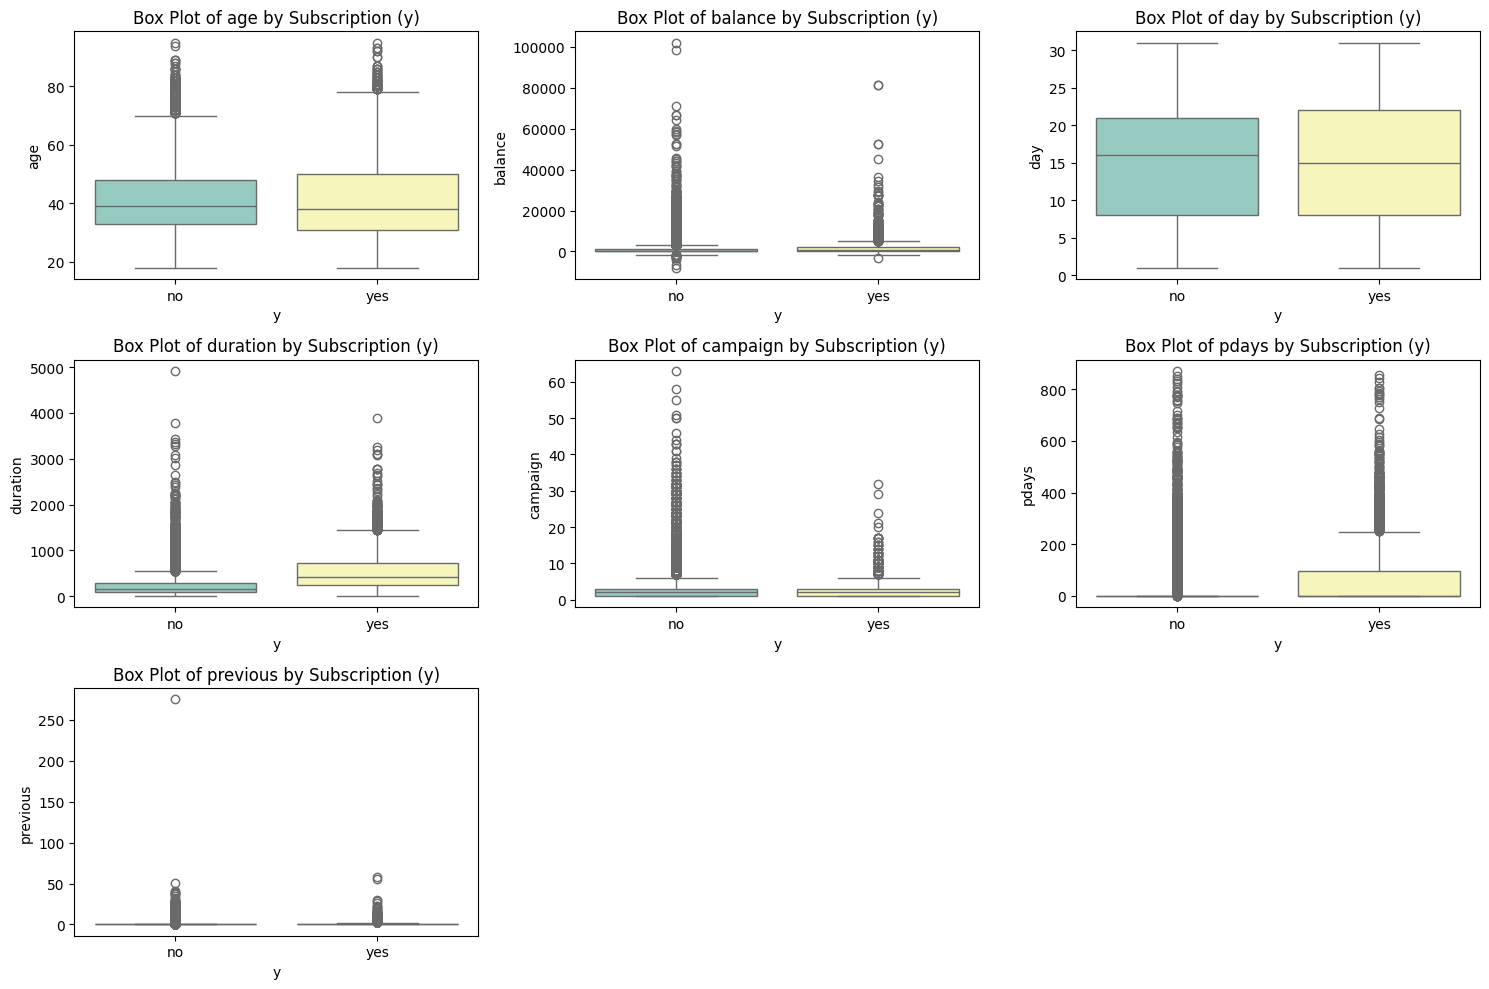

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical variables of interest
numerical_columns = ['age', 'balance', 'day','duration', 'campaign', 'pdays', 'previous']

# Create boxplots for each numerical variable grouped by 'y'
plt.figure(figsize=(15, 10))  # Adjust figure size
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)  # Create a 2x3 grid of plots
    sns.boxplot(x='y', y=col, data=df, palette='Set3')
    plt.title(f'Box Plot of {col} by Subscription (y)')
    plt.tight_layout()  # Adjust layout to prevent overlapping

plt.show()


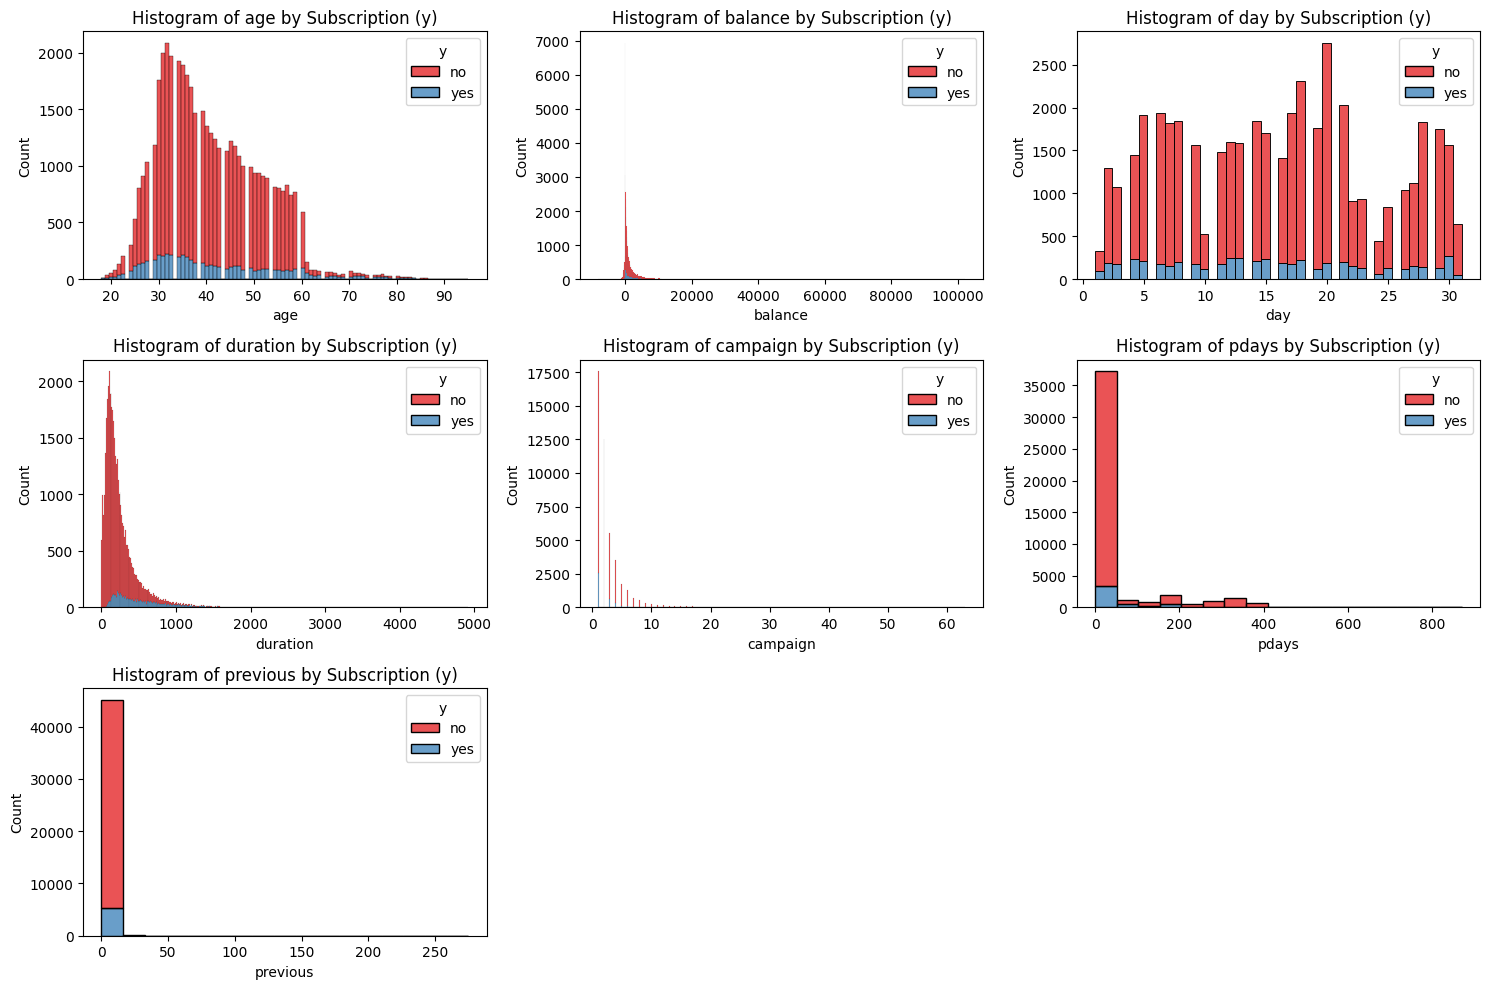

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical variables of interest
numerical_columns = ['age', 'balance', 'day','duration', 'campaign', 'pdays', 'previous']

# Create histograms for each numerical variable grouped by 'y'
plt.figure(figsize=(15, 10))  # Adjust figure size
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)  # Create a 2x3 grid of plots
    sns.histplot(data=df, x=col, hue='y', multiple='stack', kde=False, palette='Set1')
    plt.title(f'Histogram of {col} by Subscription (y)')
    plt.tight_layout()  # Adjust layout to prevent overlapping

plt.show()


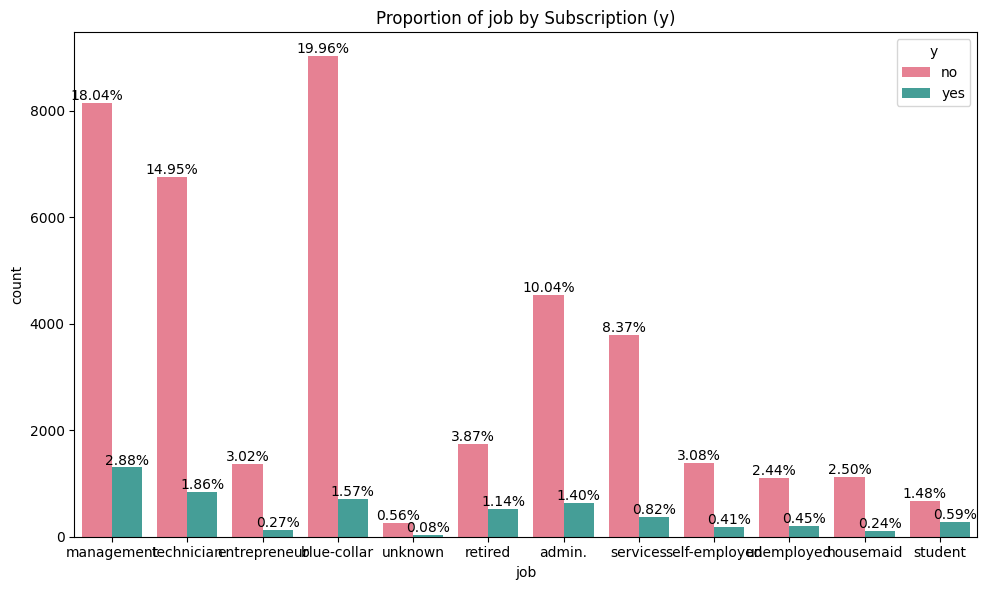

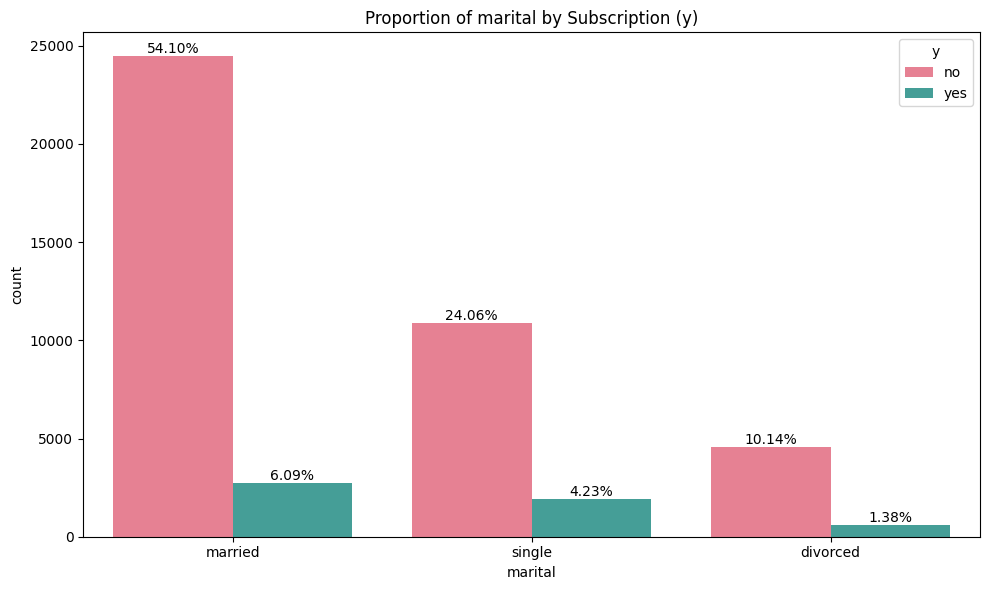

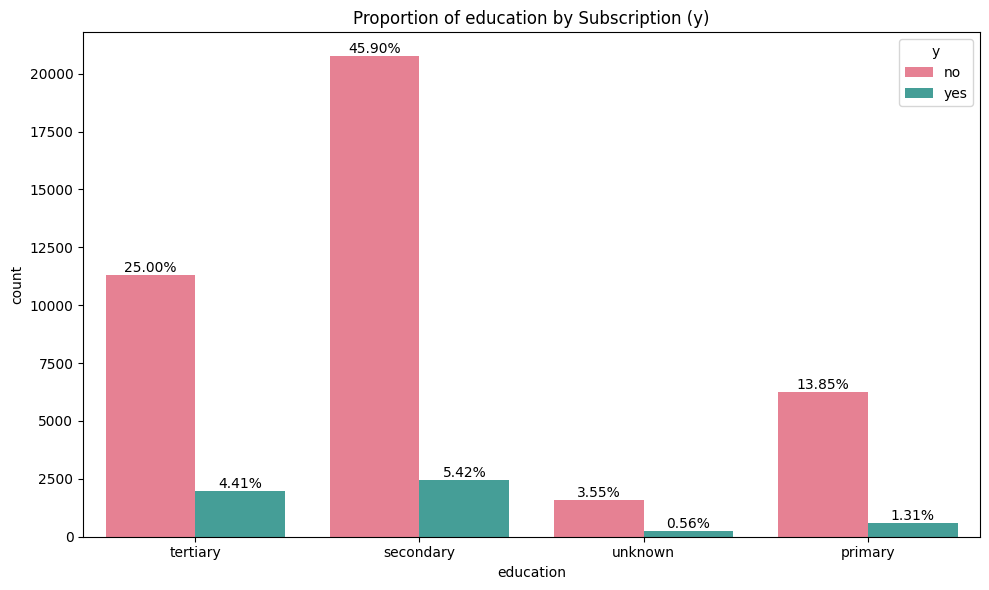

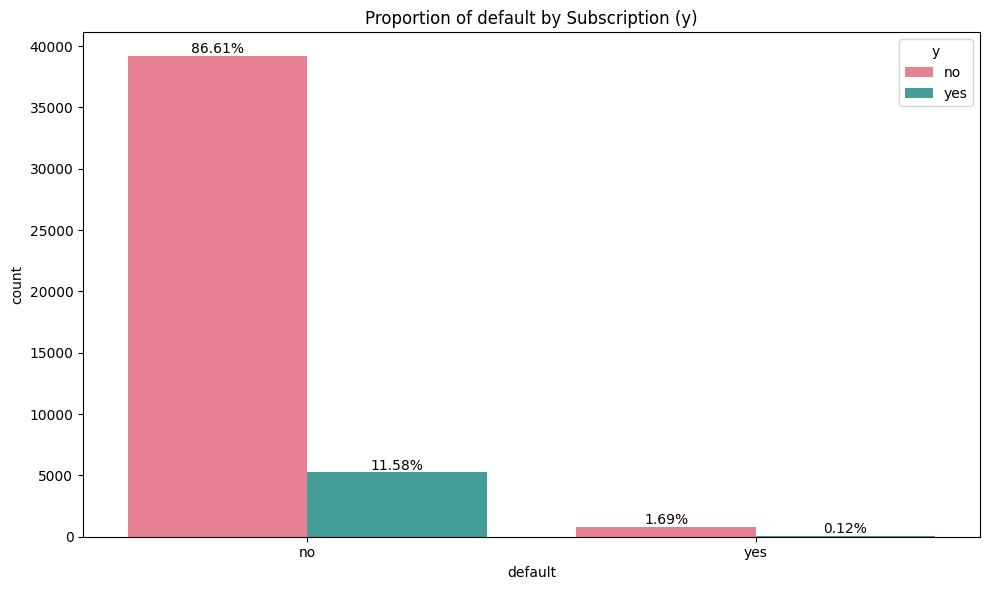

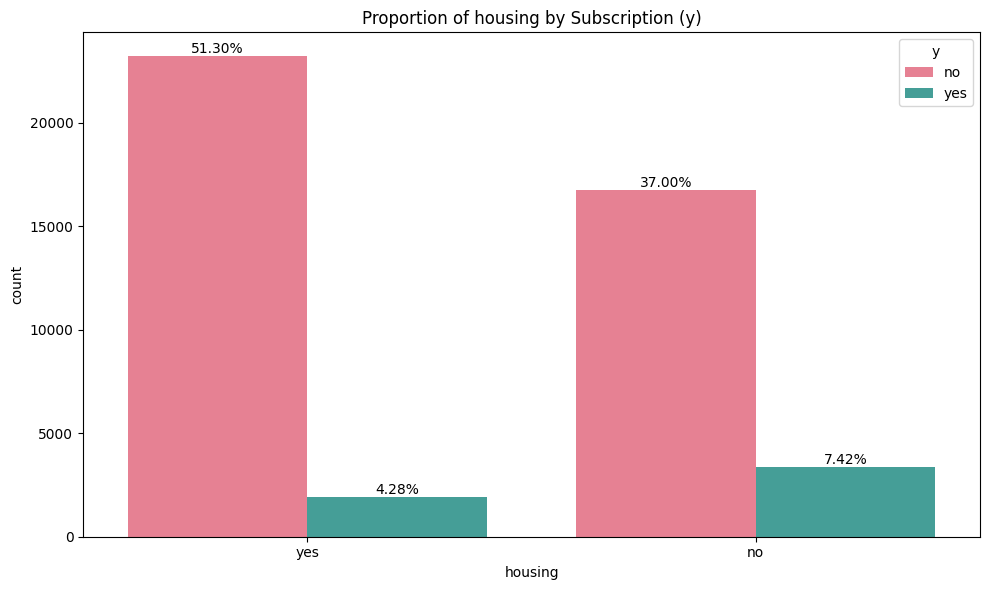

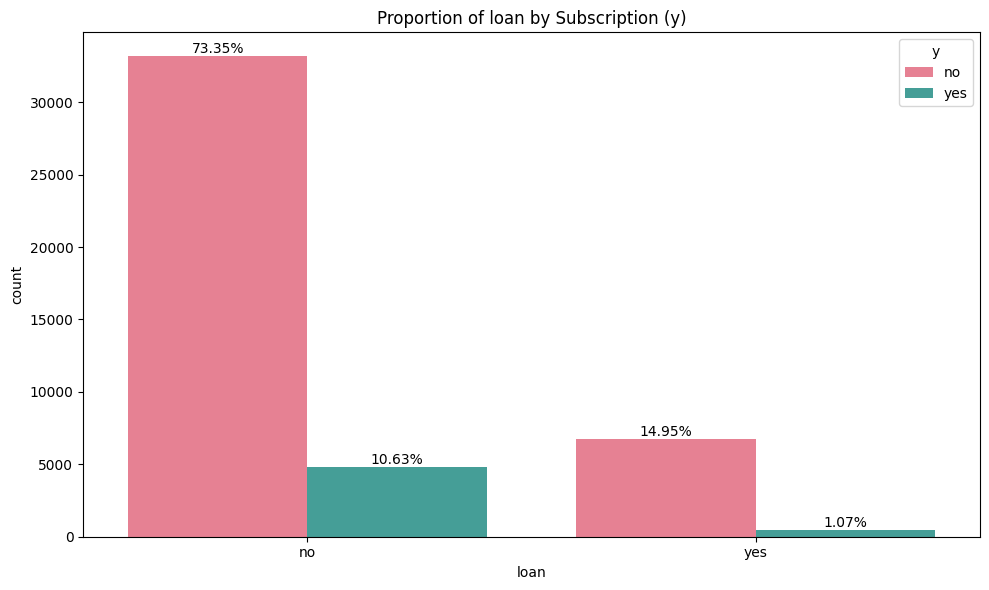

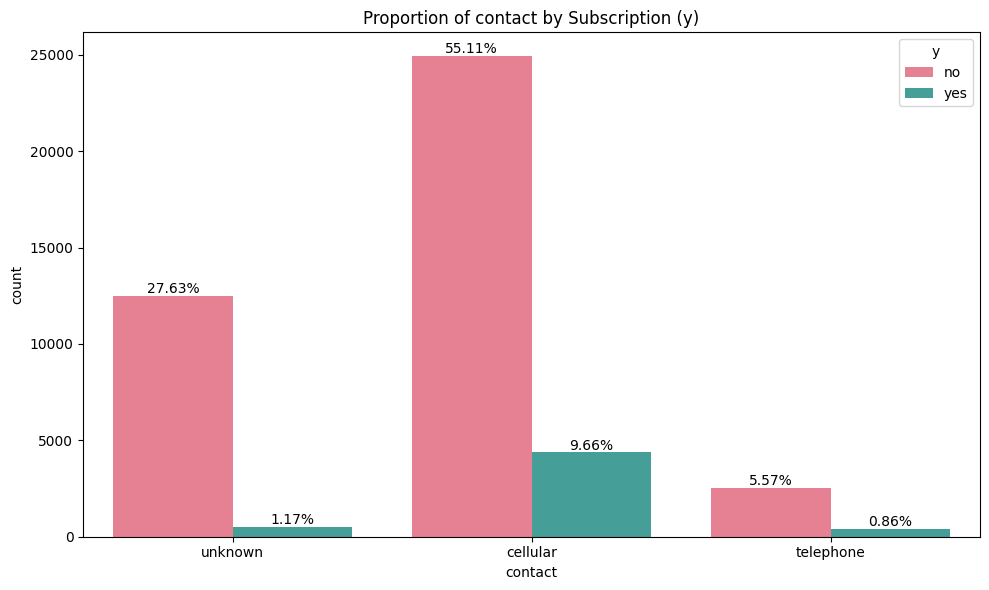

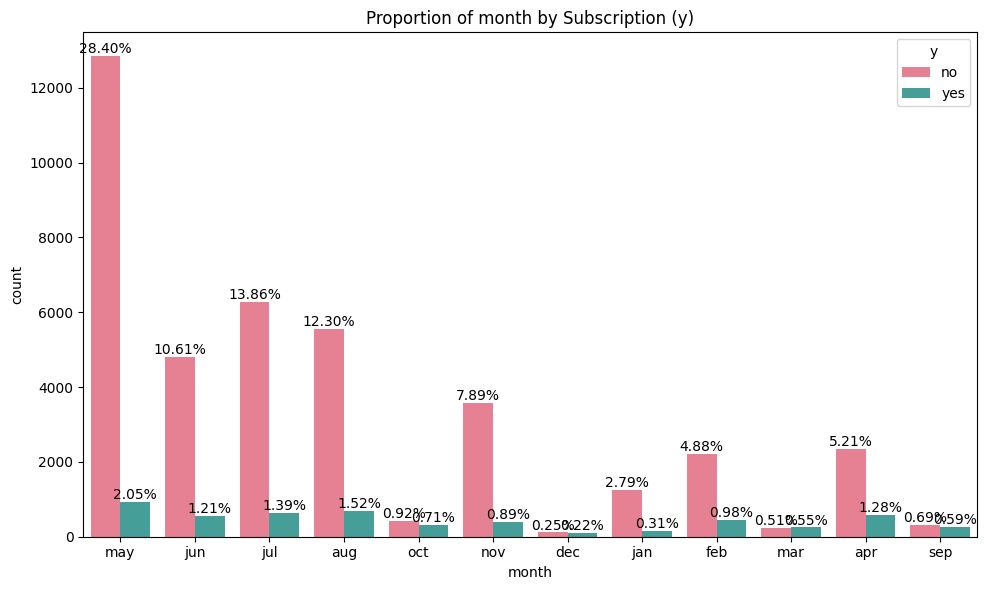

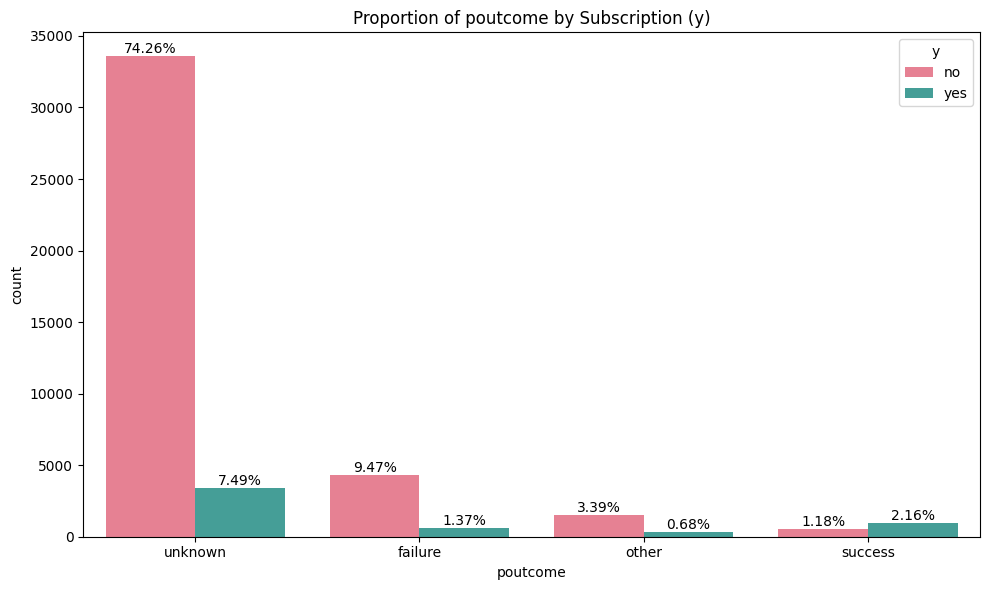

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical variables
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Plot proportions for each categorical variable
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    plot = sns.countplot(data=df, x=col, hue='y', palette='husl')  # Create a count plot with hue based on 'y'
    
    # Annotate each bar with the percentage
    for p in plot.patches:
        height = p.get_height()
        if height > 0:  # Only annotate bars with height greater than 0
            total = len(df)
            percentage = (height / total) * 100
            plot.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., height), 
                          ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    
    plt.title(f'Proportion of {col} by Subscription (y)')
    plt.tight_layout()
    plt.show()

